In [1]:
#Import all the required dependencies
import os 
import sys
import pandas as pd
import numpy as np
import geopandas
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import Weather Dataset
weatherdata = os.path.abspath(os.path.join(os.getcwd(), '../Dataset/PredictorFinalWithSTDS.csv'))
WeatherData =  pd.read_csv(weatherdata)

In [3]:
WeatherData.drop(['date'], axis = 1, inplace = True)

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import log_loss

In [5]:
X = WeatherData.drop('AoB_Category', axis = 1)
y = WeatherData['AoB_Category']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

In [43]:
pipe_knn = Pipeline(steps=[
    ("scaler", StandardScaler()), 
    ("knn", KNeighborsClassifier())
])

params_knn = {
    'knn__n_neighbors':range(5, 10, 5), 
    'knn__algorithm':['auto'], 
    'knn__p':[1, 2]
}

search_knn = RandomizedSearchCV(pipe_knn, params_knn, scoring='accuracy', cv=3, refit=True, n_iter=2, verbose = 2)

search_knn.fit(X_train, y_train)
y_hat_knn = search_knn.predict(X_test)


Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] END ..knn__algorithm=auto, knn__n_neighbors=5, knn__p=1; total time=  48.2s
[CV] END ..knn__algorithm=auto, knn__n_neighbors=5, knn__p=1; total time=  41.6s
[CV] END ..knn__algorithm=auto, knn__n_neighbors=5, knn__p=1; total time=  39.4s
[CV] END ..knn__algorithm=auto, knn__n_neighbors=5, knn__p=2; total time=  12.9s
[CV] END ..knn__algorithm=auto, knn__n_neighbors=5, knn__p=2; total time=  16.5s
[CV] END ..knn__algorithm=auto, knn__n_neighbors=5, knn__p=2; total time=  17.1s


In [45]:
display(search_knn.best_params_)
display(search_knn.best_score_)

{'knn__p': 1, 'knn__n_neighbors': 5, 'knn__algorithm': 'auto'}

0.9906329267039277

In [46]:
from sklearn.ensemble import RandomForestClassifier
rand_clf = RandomForestClassifier(max_depth=2, random_state = 42)
rand_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=42)

In [47]:
from sklearn.metrics import accuracy_score
y_pred = rand_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.7569453587886767

[[    0     0   570     0   376]
 [    0  3697     0     0  2793]
 [    0   475  2835     0  1140]
 [    0   101     0     0    83]
 [    0     0     0     0 10715]]


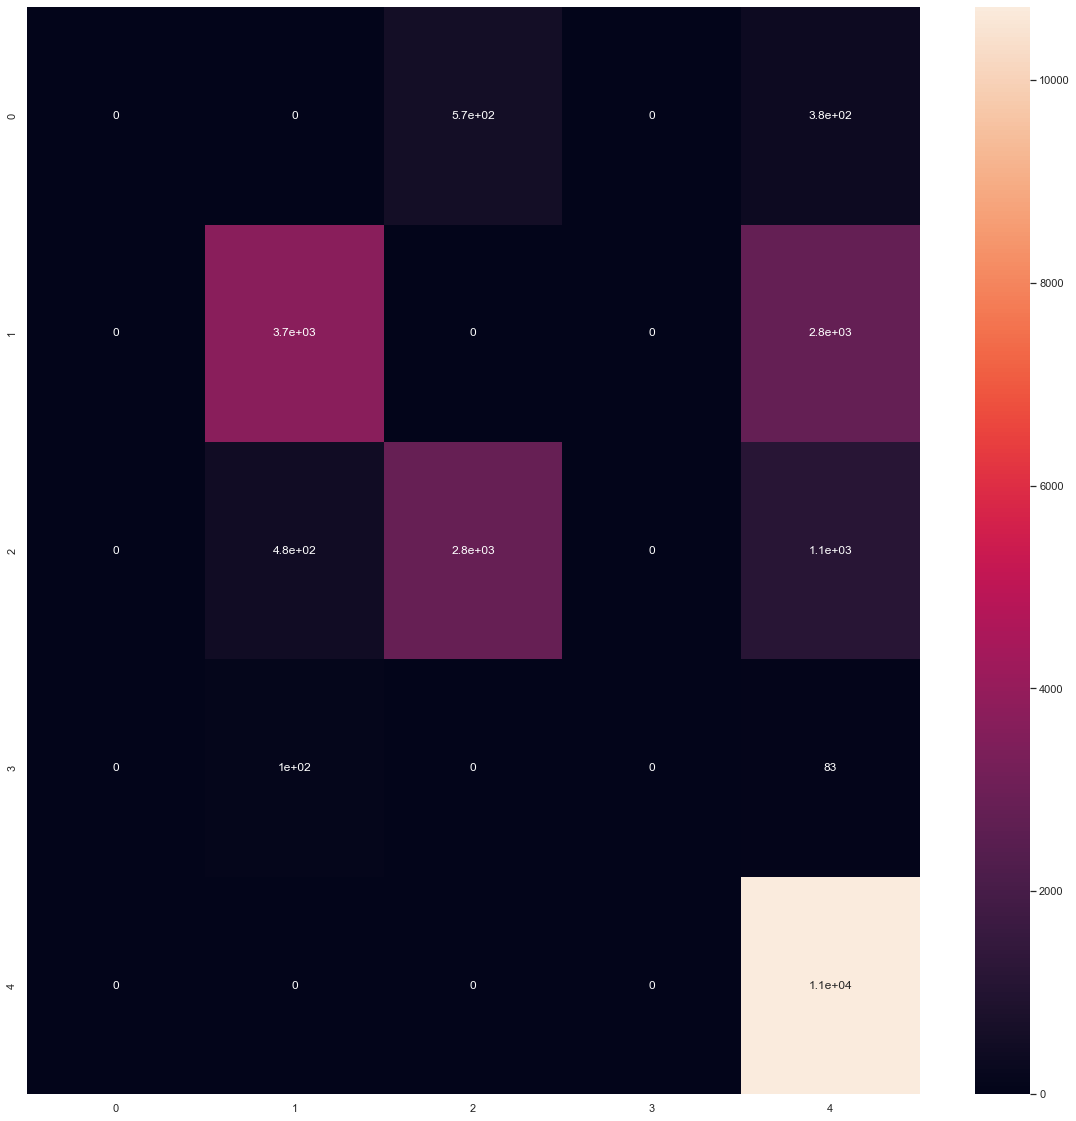

NameError: name 'classification_report' is not defined

In [48]:
print(confusion_matrix(y_test, rand_clf.predict(X_test)))
sns.set(rc={'figure.figsize':(20,20)})
sns.heatmap(confusion_matrix(y_test, rand_clf.predict(X_test)), annot = True)
plt.show()
print(classification_report(y_test, rand_clf.predict(X_test)))

In [49]:
from sklearn.model_selection import GridSearchCV

# Initialize the model 
clf = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=5, min_samples_split=2)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 4, 6]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object with the training data
grid_search.fit(X_train, y_train)

# Print the best parameters from the grid search
print(grid_search.best_params_)

{'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 2, 'n_estimators': 50}


In [51]:
grid_predictions = grid_search.predict(X_test)

In [54]:
print(classification_report(y_test, grid_predictions)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       946
           1       0.98      1.00      0.99      6490
           2       1.00      0.97      0.99      4450
           3       1.00      1.00      1.00       184
           4       1.00      1.00      1.00     10715

    accuracy                           0.99     22785
   macro avg       1.00      0.99      1.00     22785
weighted avg       0.99      0.99      0.99     22785



In [55]:
from sklearn.metrics import accuracy_score
y_pred = grid_search.predict(X_test)
accuracy_score(y_test, y_pred)

0.9946894886987053

[[  946     0     0     0     0]
 [    0  6490     0     0     0]
 [    0   121  4329     0     0]
 [    0     0     0   184     0]
 [    0     0     0     0 10715]]


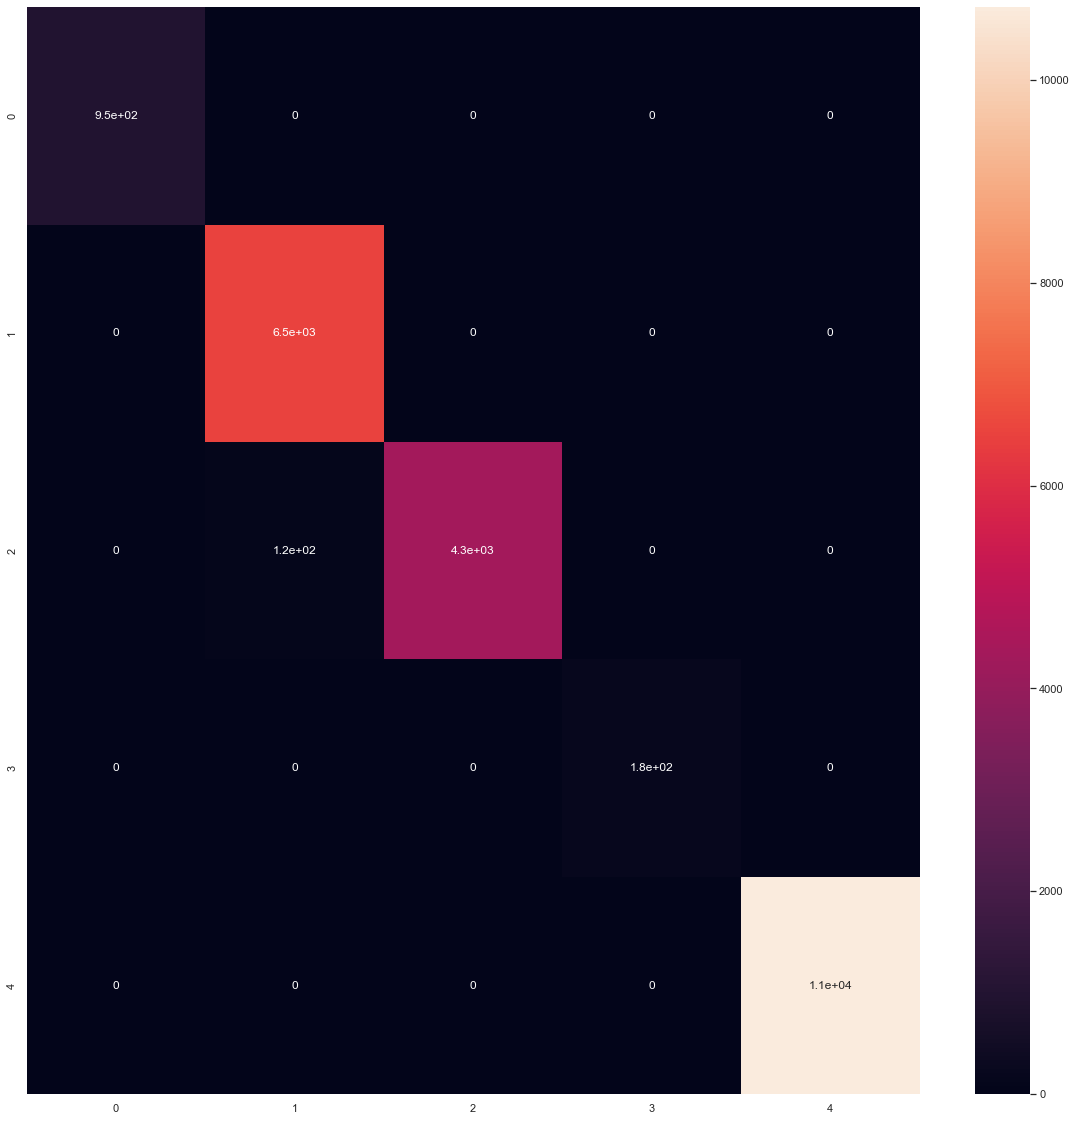

In [56]:
print(confusion_matrix(y_test, grid_search.predict(X_test)))
sns.set(rc={'figure.figsize':(20,20)})
sns.heatmap(confusion_matrix(y_test, grid_search.predict(X_test)), annot = True)
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
rf_score = cross_val_score(grid_search, X_train, y_train)
rf_score.mean()